# 04 - Distribui√ß√£o Normal e Teorema Central do Limite

Nessa aula, iremos tratar dos seguintes conte√∫dos:
- Distribui√ß√£o Normal
- Teorema Central do Limite

<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>

## 

## Distribui√ß√£o Normal

A distribui√ß√£o normal √© uma das distribui√ß√µes mais conhecidas da estat√≠stica/probabilidade! Ela √©  representada por uma **curva sim√©trica em torno do seu ponto m√©dio**, apresentando assim seu famoso formato de **sino** (bell shape).  

A curva de distribui√ß√£o normal representa o comportamento de **diversos processos e fen√¥menos comuns**, como por exemplo: altura ou peso de uma popula√ß√£o, a press√£o sangu√≠nea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

A distribui√ß√£o normal serve tamb√©m como base para a infer√™ncia estat√≠stica cl√°ssica, sendo a premissa em diversos modelos e m√©todos.

<br><br>

### Defini√ß√£o Matem√°tica

A Vari√°vel aleat√≥ria cont√≠nua $X$ que tome todos os valores na reta real $-\infty < X < \infty$ segue uma distribui√ß√£o normal (ou Gaussiana) se sua fun√ß√£o de densidade de probabilidade √© dada por:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x - \mu)^2}{2\sigma^2}} $$

Onde respectivamente temos como __valor esperado__ e __vari√¢ncia__ da distribui√ß√£o normal:

- __Valor esperado:__ $E[X] = \mu$

- __Vari√¢ncia:__ $V[X] = \sigma^2$


<br>

Usualmente aplicamos a nota√ß√£o X ~ N($\mu$,$\sigma^2$) para representar uma vari√°vel aleat√≥ria **com distribui√ß√£o normal** de valor esperado/m√©dia $\mu$ e vari√¢ncia $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>


Em uma distribui√ß√£o normal a m√©dia, mediana e moda dos dados possuem o mesmo valor. 

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">


Vamos ver algumas formas de gerarmos valores de acordo com uma distribui√ß√£o Normal:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

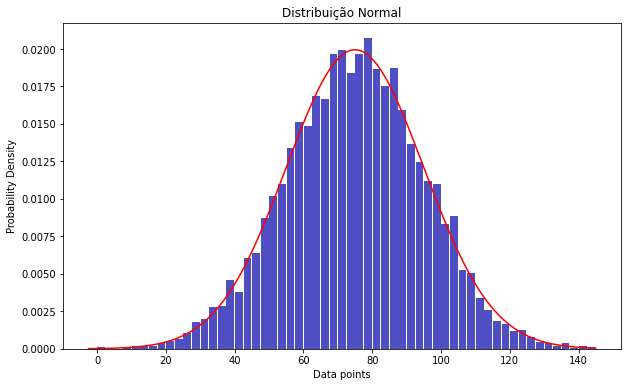

In [2]:
# fun√ß√£o densidade de probabilidade da normal
def normal_dist(x, mu, sigma):
    prob_density = (1/(sigma*(math.sqrt(2*np.pi)))) * \
        np.exp(-0.5*((x - mu)/sigma)**2)
    return prob_density

# define valores para a m√©dia e desvio padr√£o (obs.: sigma = sqrt(variancia))
mu = 75
sigma = 20

# N√∫mero de amostras geradas
N = 10000

# Define um vetor X com os valores alea√≥rios da distribui√ß√£o normal segundo o mu e sigma
X = np.random.normal(mu, sigma, N)


# Define o tamanho de uma figura para o gr√°fico
plt.figure(figsize=(10, 6))

# Plot do histograma dos valores aleat√≥rios
Pk, bins, ignored = plt.hist(X,
                             bins='auto',
                             density=True,
                             color='#0504aa',
                             alpha=0.7,
                             rwidth=0.9)

# define os valores de x entre o m√≠nimo e m√°ximo para gerarmos a curva normal
x = np.linspace(np.min(X), np.max(X), 200)

# Dados para a curva normal
pdf = normal_dist(x, mu, sigma)

# Cria um t√≠tulo
plt.title('Distribui√ß√£o Normal')

# Plot da curva normal
plt.plot(x, pdf, color='red')

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Probability Density')

# Mostrao Gr√°fico
plt.show()

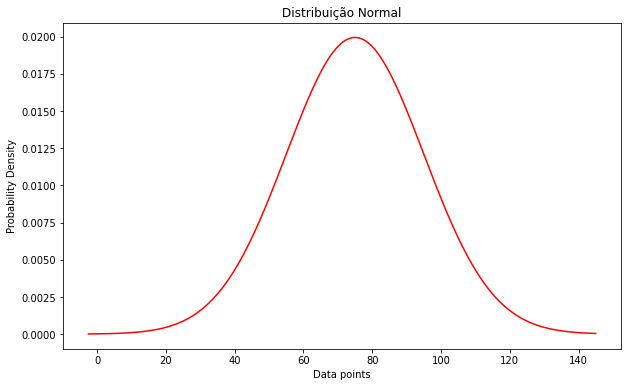

In [3]:
import scipy

# Gerando a mesma curva normal a partir de uma fun√ß√£o do scipy
y = scipy.stats.norm(loc = mu, scale = sigma).pdf(x)

# Define o tamanho de uma figura para o gr√°fico
plt.figure(figsize=(10,6))

#Cria um titulo
plt.title('Distribui√ß√£o Normal')

# Plot da curva normal
plt.plot(x, y, color = 'red')

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Probability Density')

# Mostra o Gr√°fico
plt.show()

## 

## Normaliza√ß√£o ou Z-Score
<br>

Imagine ter que calcular a probabilidade de uma distribui√ß√£o normal de um determinado evento, utilizando a fun√ß√£o de densidade de probabilidade. Seria bastante trabalho e nem um pouco usual! 

Para isso ent√£o que existe uma rela√ß√£o conhecida como normaliza√ß√£o ou __Z-Score__, onde este par√¢metro nada mais √© que __o n√∫mero de desvios padr√µes que a observa√ß√£o est√° com rela√ß√£o √† m√©dia__:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$


<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>
<br>

Como vimos acima, em uma distribui√ß√£o normal, 99.73% das observa√ß√µes s√£o esperadas de estar entre 3 desvios-padr√£o da m√©dia. Assim, oberva√ß√µes para al√©m desta faixa s√£o muito improv√°veis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers. Assim, √© comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum tamb√©m variar este z-score limite, para 2.5 o, 3.5, etc.)

<br>

**OBS.: naturalmente, este m√©todo √© altamente dependente da hip√≥tese de que seus dados s√£o normalmente distribu√≠dos! Por isso, funciona apenas aproximadamente para outros casos. Mas √© uma boa aproxima√ß√£o, em geral.**



onde o objetivo √© convertermos os dados para uma distribui√ß√£o normal na forma X ~ N($\mu$, $\sigma^2$) 

**Exemplo**: Se $X \sim  \mathcal{N}(\mu=165,\,\sigma^{2}=9)$, calcule $P(X<162)$.

In [4]:
# fun√ß√£o para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# m√©dia
mu = 165

# Desvio padr√£o
sigma = np.sqrt(9)

# Z score para 162
z = (162 - mu)/sigma

print('Z-score: ', z)
print('Probabilidade :', st.norm.cdf(z))

Z-score:  -1.0
Probabilidade : 0.15865525393145707


**Exemplo**: Se $X \sim  \mathcal{N}(\mu=10,\,\sigma^{2}=4)$, calcule $P(X>13)$.

Obs.: Lembrando que para calcular essa probabilidade temos que fazer da seguinte forma:

$$ P(X > 13) = 1 - P( X \leq 13) $$

In [5]:
# fun√ß√£o para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# M√©dia
mu = 10

# Desvio Padr√£o
sigma = np.sqrt(4)

# Z Score para 13
z = (13 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score: ', z)
print('Probabilidade: ', 1 - st.norm.cdf(z))

Z - Score:  1.5
Probabilidade:  0.06680720126885809


**Exemplo:** O peso m√©dio de 500 estudantes do sexo masculino de uma determinada universidade √© 75,5 Kg e o desvio padr√£o √© 7,5 Kg. Admitindo que os pesos s√£o normalmente distribu√≠dos, determine a percentagem de estudantes que pesam:

a) entre 60 e 77,5 Kg.

$$
P(60 \leq X \leq 77,5) = P\left(\frac{60-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{77,5-\mu}{\sigma}\right)=P\left(\frac{60-\mu}{\sigma} \leq Z \leq \frac{77,5-\mu}{\sigma}\right) = 
$$
$$
= P\left(Z \leq \frac{77,5-\mu}{\sigma}\right)-P\left( Z \leq \frac{60-\mu}{\sigma}\right)
$$ 


In [6]:
# fun√ß√£o para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# M√©dia
mu = 75.5

# Desvio Padr√£o
sigma = 7.5

# Calculando Z1 para 60 kg
z1 = (60 - mu)/sigma

# Calculando Z2 para 77.5 kg
z2 = (77.5 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score para 60 kg:   ', z1)
print('Z - Score para 77.5 kg: ', z2)
print('Probabilidade: ', st.norm.cdf(z2) - st.norm.cdf(z1))

Z - Score para 60 kg:    -2.066666666666667
Z - Score para 77.5 kg:  0.26666666666666666
Probabilidade:  0.5857543024471563


Podemos tamb√©m resolver este item simulando os resultados:

In [7]:
# m√©tricas mu e sigma
mu = 75.5
sigma = 7.5

# tamanho da amostra
N = 1000000

# fixar uma semente
np.random.seed(2)

# Gerar uma amostra com mu e sigma para os N valores
X = np.random.normal(mu, sigma, N)

# Loop para o c√°lculo da probabilidade
m = 0
for x in X:
    if x >= 60 and x <= 77.5:
        m = m + 1
print('Probabilidade (simula√ß√£o):', m/N)

Probabilidade (simula√ß√£o): 0.586349


b) mais do que 92,5 Kg. 
$$
P(X > 92,5) = P\left( \frac{X-\mu}{\sigma}\geq \frac{92,5-\mu}{\sigma}\right) = P\left( Z \geq \frac{92,5-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{92,5-\mu}{\sigma}\right)
$$

In [8]:
# fun√ß√£o para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# M√©dia
mu = 75.5

# Desvio Padr√£o
sigma = 7.5

# Z Score para 92.5 kg
z = (92.5 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score: ', z)
print('Probabilidade: ', 1 - st.norm.cdf(z))

Z - Score:  2.2666666666666666
Probabilidade:  0.011705298080558313


Simulando:

In [9]:
# m√©trica mu e sigma
mu = 75.5
sigma = 7.5

# tamanho da amostra
N = 1000

# fixa a semente aleat√≥ria
np.random.seed(2)

# Gera uma amostra com mu e sigma para os N valores
X = np.random.normal(mu, sigma, N)


# Loop para o calculo da probabilidade
m = 0
for x in X:
    if x > 92.5:
        m = m + 1
print('Probabilidade (simula√ß√£o):', m/N)

Probabilidade (simula√ß√£o): 0.017


Uma forma mais tradicional tamb√©m para calcular a probabilidade a partir de uma distribui√ß√£o normal seria justamente utilizar de valores tabelados para o __Z-Score__:

<img src = "https://media.cheggcdn.com/media/70e/70ea2b20-f693-43d1-aa34-33289a97d606/phpqH8k6j" width = 800>

## 

## Teorema Central do Limite (TCL)

Esse √© um dos teoremas mais poderosos e fundamentais da estat√≠stica, porque ele √© usado **como base para muitos outros resultados**. 

A ideia √© que muitos dos resultados de infer√™ncia estat√≠stica s√£o v√°lidos assumindo como hip√≥tese que os dados sob an√°lise (**mais precisamente, os estimadores pontuais**) seguem uma distribui√ß√£o normal. 

No entanto, h√° muitos casos de interesse em que a **distribui√ß√£o populacional n√£o √© normal** -- e, na verdade, n√£o temos como saber com seguran√ßa qual √© a distribui√ß√£o populacional, dado que temos apenas acesso √†s amostras!

Assim, a priori, muitos dos resultados e m√©todos da infer√™ncia estat√≠stica seriam invalidados, dado que n√£o podemos assegurar qual √© a distribui√ß√£o populacional dos dados que estamos analisando.

E √© neste contexto que o TLC mostra seu poder e import√¢ncia, pois ele mostra que **estimadores pontuais de par√¢metros populacionais ser√£o normalmente distribu√≠dos, INDEPENDENTE DA DISTRIBUI√á√ÉO POPULACIONAL!**

Vamos enunci√°-lo, como:


Seja uma amostra aleat√≥ria $(X_1,X_2,\ldots,X_n)$ retiradas de uma popula√ß√£o com m√©dia $\mu$ e desvio padr√£o $\sigma$. A distribui√ß√£o amostral de $\bar{X}$ aproxima-se, para n grande ($n > 30$), de uma distribui√ß√£o normal com m√©dia $E[\bar{X}]=\mu$ e vari√¢ncia $\sigma^2/n$.<br>.

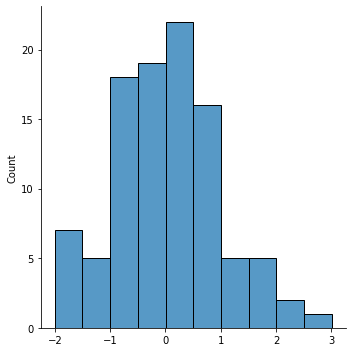

In [10]:
# tamanho da amostra
N = 100

# Gera a amostra de acordo com a distribui√ß√£o normal
amostra_normal = np.random.normal(0, 1, N)

# Gera o gr√°fico
sns.displot(amostra_normal)

# Mostra o gr√°fico
plt.show()

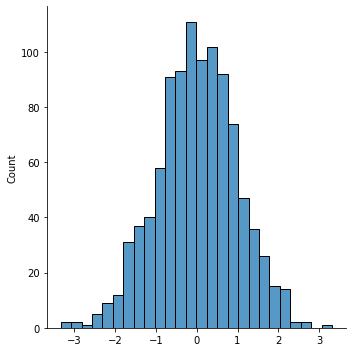

In [11]:
# tamanho da amostra
N = 1000

# Gera a amostra de acordo com a distribui√ß√£o normal
amostra_normal = np.random.normal(0, 1, N)

# Gera o gr√°fico
sns.displot(amostra_normal)

# Mostra o gr√°fico
plt.show()

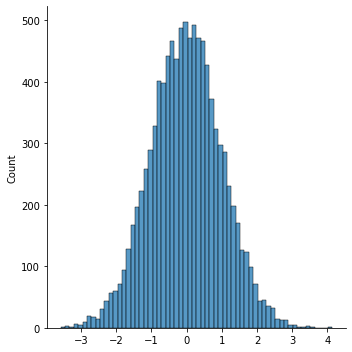

In [12]:
# tamanho da amostra
N = 10000

# Gera a amostra de acordo com a distribui√ß√£o normal
amostra_normal = np.random.normal(0, 1, N)

# Gera o gr√°fico
sns.displot(amostra_normal)

# Mostra o gr√°fico
plt.show()

**Exemplo:** Seja a vari√°vel aleat√≥ria com distribui√ß√£o de probabilidade: P(X=3)=0,4; P(X=6)=0,3; P(X=8)=0,3. Uma amostra com 40 observa√ß√µes √© sorteada. Qual √© a probabilidade de que a m√©dia amostral ser maior do que 5?

In [14]:
# Fun√ß√£o para a esperan√ßa
def esperanca(X, P):
    E = 0
    for i in range(0, len(X)):
        E = E + X[i] * P[i]
    return E


# Fun√ß√£o para a vari√¢ncia
def variancia(X, P):
    E = 0
    E2 = 0
    for i in range(0, len(X)):
        E = E + X[i] * P[i]
        E2 = E2 + (X[i]**2) * P[i]
    
    V = E2 - E**2
    return V


# Vetor de Eventos
X = [3, 6, 8]

# Vetor de Probabilidades
P = [0.4, 0.3, 0.3]

# Calculo da Esperan√ßa
E = esperanca(X, P)

# Calculo da Vari√¢ncia
V = variancia(X, P)

# Print das m√©tricas
print("Esperan√ßa: ", E)
print("Vari√¢ncia: ", V)

Esperan√ßa:  5.4
Vari√¢ncia:  4.439999999999991


Valor te√≥rico a partir do Z-Score:

In [15]:
# Considerando distribui√ß√£o normal = SIMMMMM - teorema do limite central

# Fun√ß√£o para calcular a probabilidade pelo Z Score
import scipy.stats as st

# Define a m√©dia
mu = E

# Define o desvio padr√£o
sigma = np.sqrt(V)

# Tamanho da amostra
n = 40

# X a verificar
x = 5

# Z-score
Z = (x - mu) / (sigma / np.sqrt(n))

# Calculo da probabilidade
prob = 1 - st.norm.cdf(Z)

# PRint da probabilidade
print('Probabilidade: ', prob)

Probabilidade:  0.885046886863795


Vamos sortear v√°rias amostras de tamanho n = 40 e verificar qual a probabilidade da m√©dia dessa amostra ser maior do que 5.

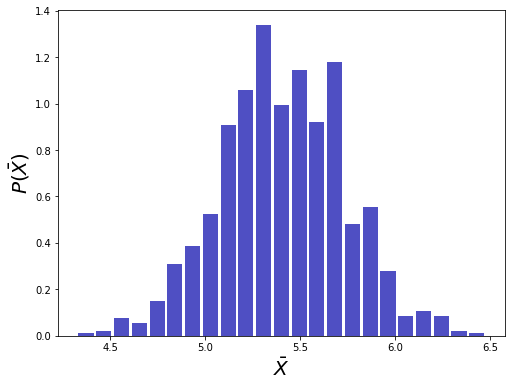

Media das amostras:  5.40765
Media da popula√ß√£o:  5.4


In [16]:
# Tamanho de amostras
n = 40

# numero de simula√ß√µes
ns = 1000

# Vetor vazio para armazenar a media amostral
vx = []  # armazena a media amostral

# Loop para as simula√ß√µes
for s in range(0, ns):
    A = np.random.choice(X, n, p=P)
    vx.append(np.mean(A))

# Plot do gr√°fico
plt.figure(figsize=(8, 6))
plt.hist(x=vx,
         bins='auto',
         color='#0504aa',
         alpha=0.7,
         rwidth=0.85,
         density=True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show()

# Print das metricas
print("Media das amostras: ", np.mean(vx))
print("Media da popula√ß√£o: ", E)

A probabilidade de ser maior do que 5:

In [17]:
prob_s = 0

for i in range(0, len(vx)):
    if (vx[i] > 5):
        prob_s = prob_s + 1

prob_s = prob_s / len(vx)

print("Probabilidade > 5: ", prob_s)
print("Valor te√≥rico    : ", prob)

Probabilidade > 5:  0.893
Valor te√≥rico    :  0.885046886863795


In [18]:
prob/prob_s

0.9910939382573292

## 

## Exerc√≠cios

In [19]:
import scipy.stats as st
import numpy as np

**1)** Uma m√°quina de bebidas est√° regulada de modo a servir uma m√©dia de 150ml por copo. Se a quantidade servida por copo seguir uma distribui√ß√£o normal com desvio padr√£o de 20 ml, determine a percentagem de copos que conter√£o mais de 175ml de bebida.

In [20]:
media = 150
dp = 20
z = (175-media)/dp
print((1-st.norm.cdf(z))*100,'%')

10.564977366685536 %


__2)__ O tempo para desenvolver um servidor web em uma empresa √© descrito por uma vari√°vel aleat√≥ria X, medida em dias, com distribui√ß√£o normal de m√©dia $\mu$ = 45 e vari√¢ncia $\sigma^2$ = 400. Calcule a probabilidade de que um novo servidor web ser√° finalizado entre 30 e 40 dias.

In [22]:
media = 45
dp = np.sqrt(400)
z1 = (30-media)/dp
z2 = (40-media)/dp
print((st.norm.cdf(z2)-(st.norm.cdf(z1)))*100,'%')

17.46663219402081 %


In [23]:
# fun√ß√£o para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# M√©dia
mu = 45

# Desvio Padr√£o
sigma = np.sqrt(400)

# Calculando Z1 para 30 dias
z1 = (30 - mu)/sigma

# Calculando Z2 para 40 dias
z2 = (40 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score para 30 dias: ', z1)
print('Z - Score para 40 dias: ', z2)
print('Probabilidade         : ', st.norm.cdf(z2) - st.norm.cdf(z1))

Z - Score para 30 dias:  -0.75
Z - Score para 40 dias:  -0.25
Probabilidade         :  0.1746663219402081


__3)__ Uma popula√ß√£o √© descrita pela seguinte distribui√ß√£o de probabilidades:
    
- ùëÉ(ùëã = 2) = 0,2;
- ùëÉ(ùëã = 4) = 0,4;
- ùëÉ(ùëã = 6) = 0,4

Uma amostra com 50 observa√ß√µes √© sorteada. Calcule a probabilidade de que a m√©dia dessa amostra seja maior do que 4.5

In [24]:
# Fun√ß√£o para a esperan√ßa
def esperanca(X, P):
    E = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
    return E
    
# Fun√ß√£o para a vari√¢ncia
def variancia(X ,P):
    E = 0; E2 = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
        E2 = E2 + (X[i]**2)*P[i]
    V = E2-E**2
    return V

# Vetor de Eventos
X = [2, 4, 6]

# Vetor de Probabilidades
P = [0.2, 0.4, 0.4]

# Calculo da Esperan√ßa
E = esperanca(X,P)

# Calculo da Vari√¢ncia
V = variancia(X,P)

# Print das m√©tricas
print("Esperan√ßa: ", E)
print("Vari√¢ncia: ", V)

Esperan√ßa:  4.4
Vari√¢ncia:  2.2399999999999984


Valor te√≥rico a partir do Z-Score:

In [25]:
# Fun√ß√£o para calcaur a probabilidade pelo Z Score
import scipy.stats as st

# Define a m√©dia
mu = E

# Define o desvio padr√£o
sigma = np.sqrt(V)

# Tamanho da amostra
n = 50

# X a verificar
x = 4.5

# Z-score
Z = (x - mu)/(sigma/np.sqrt(n))

# Calculo da probabilidade
prob = 1-st.norm.cdf(Z)

# PRint da probabilidade
print("Z Score :", Z)
print('Probabilidade: ', prob)

Z Score : 0.4724555912615326
Probabilidade:  0.31830081628180096


__4)__ Em uma empresa de vendas planos de internet, a dura√ß√£o de conversas telef√¥nicas (em minutos), segue o modelo de uma distribui√ß√£o exponencial com par√¢metro $\lambda = \frac{1}{5}$. Observando-se uma amostra aleat√≥ria de 50 dessas chamadas, qual ser√° a probabilidade de que tais amostras em m√©dia n√£o ultrapassem 6 minutos?

---
Para a distribui√ß√£o exponencial, temos que:
    
$$ E[X] = \frac{1}{\lambda} = 5$$

<br>

$$ V[X] = \frac{1}{\lambda^2} = 25 $$

<br>

Queremos calcular $P(\bar{X} < 6)$, portanto utilizando o Teorema do Limite Central:

$$
P(\bar{X} \leq 6) = P\left(\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}} \leq \frac{6-\mu}{\frac{\sigma}{\sqrt{n}}}\right)
$$

In [26]:
# Fun√ß√£o para calcaur a probabilidade pelo Z Score
import scipy.stats as st

# Define a m√©dia
mu = 5

# Define o desvio padr√£o
sigma = np.sqrt(25)

# Tamanho da amostra
n = 50

# X a verificar
x = 6

# Z-score
Z = (x - mu)/(sigma/np.sqrt(n))

# Calculo da probabilidade
prob = st.norm.cdf(Z)

# PRint da probabilidade
print('Z-Score:       ', Z)
print('Probabilidade: ', prob)

Z-Score:        1.4142135623730951
Probabilidade:  0.9213503964748575
